# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [2]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [4]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 166 255  42   0   0   0
    0   0  18  20   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  55 251 2

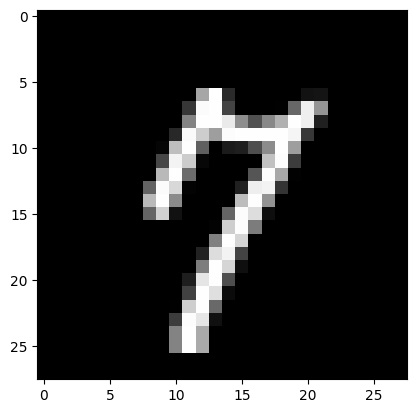

In [5]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
test_images_orig.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

Label: 0


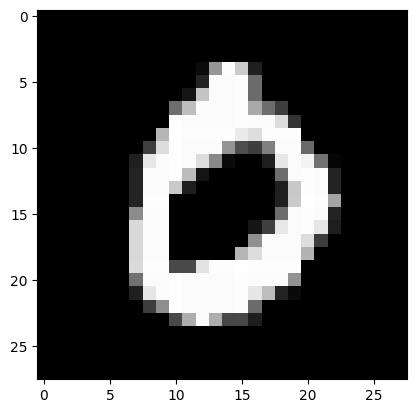

In [11]:
#your code here
print(f"Label: {test_labels[3]}")
plt.imshow(test_images_orig[3], cmap="gray") # cmap="gray"

# A first look at a neural network

## **Step 1:** The network architecture

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([ #similar to when we used a constructor from sklearn using... new DecisionTreeClassifer()
    layers.Dense(512, activation="relu"), #we have chosen 512 nodes for the hidden layer (1st Dense layer)
                                          #Faster convergence (updates the weights) during training
    layers.Dense(10, activation="softmax") #Only 10 nodes in the last Dense layer - 1 dummy value for each possible label
                                          #Exponentialy scaled - bigger values get exponentially bigger
                                          #                    - smaller values get exponentially smaller
])

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [15]:
# We want to NORMALIZE the data by dividing by the total value so we can get
# each value as a number between 0 and 1
# Makes it more efficient to train and update the weights
train_images = train_images_orig.reshape(60000, 28 * 28)

train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [16]:
#your code here
print(train_images.shape)
print(test_images.shape)



(60000, 784)
(10000, 784)


### Tensor reshaping

In [17]:
original_array = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
original_array.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [18]:
#your code here

# did not flatten here - we only did a general reshaping
# Because original 2D tensor -> reshaped 2D tensor
reshaped_array = original_array.reshape((6, 1))
print(reshaped_array.shape)

(6, 1)


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

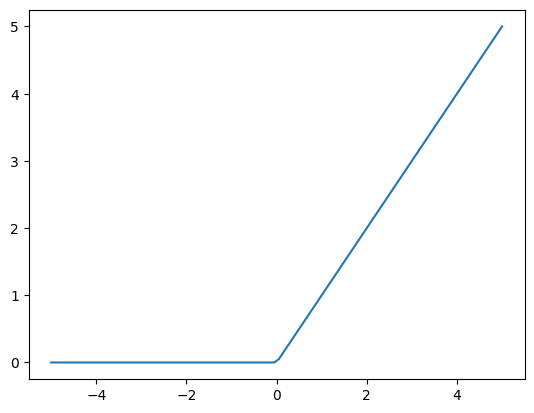

In [19]:
#your code here

def relu(x):

  # It classifies anything zero or less as output zero
  # It classifies anything more than zero as the original value
  output = np.maximum(0, x)# you can perfom numpy operations over single values or tensors because of ... B_______
  return output

# Plot this function for x in the range of -5 to 5
x = np.linspace(-5, 5, 100)

#Remember when did we use this: Linear Regression -Line of bEST Fit
y = relu(x)
plt.figure()
plt.plot(x, y)
plt.show()

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here:

### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

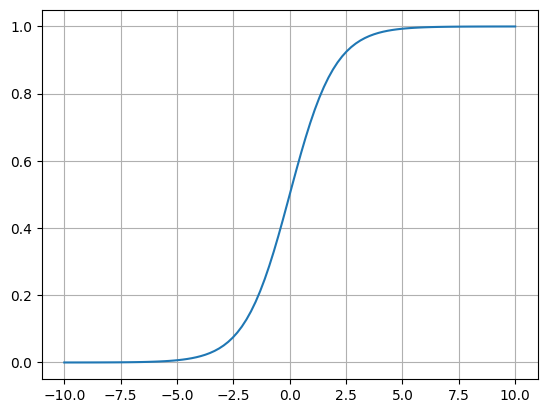

In [20]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

[0.96083428 0.78583498 0.549834   0.68997448]


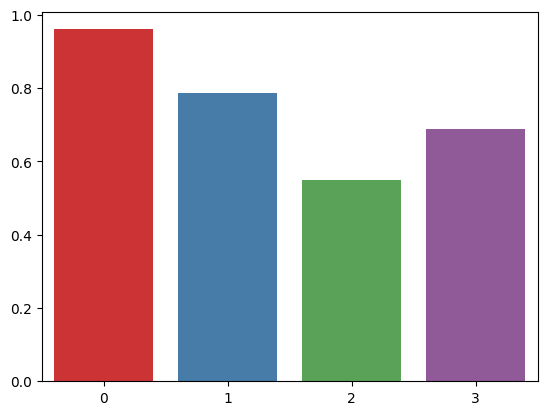

In [21]:
# we call value of the last layer before applying activation func as logits
logits = np.array([3.2, 1.3, 0.2, 0.8])
#your code here
logits_scaled = sigmoid(logits)
print(logits_scaled)

#you code here for plotting
sns.barplot(x=np.arange(4), y=logits_scaled, hue=np.arange(4), palette="Set1", legend=False)
plt.xticks(np.arange(4))
plt.show()

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [22]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """
  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

In [23]:
#your code here
logits = np.array([3.2, 1.3, 0.2, 0.8])
probs = softmax(logits)
print("Probabilities:", probs)

Probabilities: [0.77514955 0.11593805 0.03859242 0.07031998]


<ipython-input-24-3f954cbae828>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(probs)), y=probs, palette="Set1")


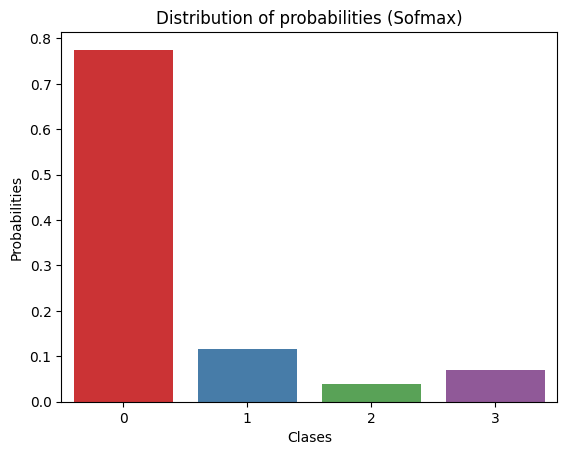

In [24]:
#my solution output
sns.barplot(x=np.arange(len(probs)), y=probs, palette="Set1")
plt.xlabel("Clases")
plt.ylabel("Probabilities")
plt.title("Distribution of probabilities (Sofmax)")
plt.xticks(np.arange(len(probs)))
plt.show()

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [26]:
#your code here
predicted_class = np.argmax(probs) #np.argmax to find predicted label

print("Predicted Class:", predicted_class)

Predicted Class: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [27]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [28]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8776 - loss: 0.4292
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9651 - loss: 0.1170
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9788 - loss: 0.0716
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.9843 - loss: 0.0526
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9882 - loss: 0.0384


## **Step 4:** Using the model to make predictions

In [29]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[2.1622313e-09, 8.3902674e-10, 2.8952388e-06, 1.0404740e-05,
        3.5695652e-12, 5.9338209e-08, 7.1938156e-14, 9.9998510e-01,
        2.9222154e-08, 1.4707338e-06],
       [5.5794209e-07, 1.6708488e-03, 9.9823439e-01, 8.0273589e-05,
        3.0228105e-11, 1.2068520e-05, 6.8218782e-07, 6.6688040e-12,
        1.0124573e-06, 1.7752866e-12],
       [9.4321476e-06, 9.9432421e-01, 3.2487052e-04, 4.9721588e-05,
        2.7220754e-04, 6.5494125e-05, 4.1877600e-05, 3.6311774e-03,
        1.2442673e-03, 3.6728328e-05]], dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here: The higher probability is 9.999851e-01. This means 1st image is from that position class ~1.0

### See the result for the prediction of the first image

In [30]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[2.1622313e-09 8.3902674e-10 2.8952388e-06 1.0404740e-05 3.5695652e-12
 5.9338209e-08 7.1938156e-14 9.9998510e-01 2.9222154e-08 1.4707338e-06]
Predicted label:  7


In [31]:
print("highest prob: ", predictions[0][7])

highest prob:  0.9999851


In [32]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


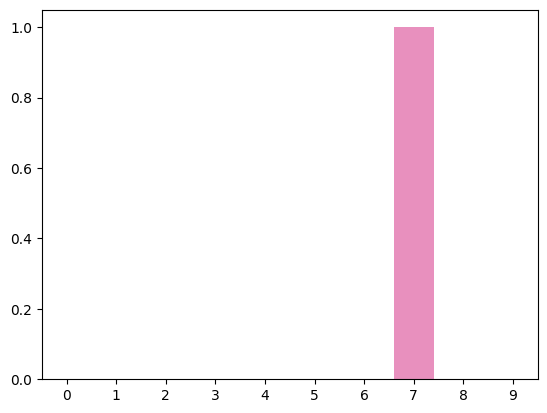

In [33]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

In [34]:
#your code here

# 4th element of test set
fourth_image = test_images[3]
fourth_image_batch = fourth_image.reshape(1, -1)

# Predictions of 4th element
fourth_prediction = model.predict(fourth_image_batch)

# np.argmax to find predicted label
predicted_label_fourth = np.argmax(fourth_prediction)

# Show prediction
print("Predicted label for the fourth element:", predicted_label_fourth)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted label for the fourth element: 0


## **Step 5:** Evaluating the model on new data

In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9745 - loss: 0.0843
test_acc: 0.9779999852180481


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.